# Plotting with pandas

It is time to learn how to plot with our favorite data wrangling tool : pandas 🐼.

We will be using the open data powering https://www.rte-france.com/eco2mix website. 

The pre-processing of the data has been already done for you. All you need is to learn how read pickles from pandas!

![pickles](https://static.wikia.nocookie.net/rickandmorty/images/4/41/Pickle_rick_transparent_edgetrimmed.png)


## Exercise - setting up our (plotting) environment

In [2]:
# load pandas, matplotlib and setup your environment for bigger figures by default (check matplotlib's "rcParams")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
#ToDo

## Exercise : loading the data from a pickle file

In [3]:
# Load from the pickle file eco2mix
df = pd.read_pickle("/home/thomas.mari@Digital-Grenoble.local/Documents/module/5.DataViz/DataViz_01/notebooks/data/eco2mix.pkl")# ToDo
df.sample(10) # take 10 samples at random

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,
2017-12-23 18:15:00,Grand-Est,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 07:00:00,Hauts-de-France,3830.0,210.0,1844.0,192.0,1.0,1.0,NaN,90.0,1490.0
2018-07-08 08:45:00,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-28 00:30:00,Bretagne,2945.0,84.0,NaN,352.0,0.0,12.0,-50.0,41.0,2505.0
2013-02-19 15:30:00,Ile-de-France,11296.0,1112.0,NaN,0.0,21.0,0.0,NaN,126.0,10034.0
2013-05-15 00:15:00,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-17 21:30:00,Hauts-de-France,5334.0,1185.0,4528.0,754.0,0.0,0.0,0.0,103.0,-1236.0
2017-12-11 00:00:00,Normandie,3974.0,445.0,9033.0,65.0,0.0,21.0,NaN,46.0,-5636.0
2013-06-08 01:45:00,PACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting with Matplotlib


##  Exercise -  Pie chart 

Choose a year in the data, and plot the share for each of the different energy sources, for example like this:

<img src="./img/pie.png" width=400px />


index range = 2013-01-01 00:00:00 --> 2018-12-31 23:45:00


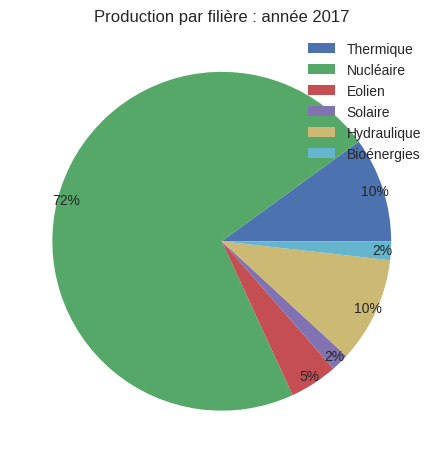

In [76]:
plt.style.use('seaborn-v0_8')
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
print(f"index range = {df.index.min()} --> {df.index.max()}")
yearOC = random.choice(range(2013,2018+1))
df['Annee'] = df.index.year
df.reset_index()
dataView1 = df[df.Annee==yearOC][['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Annee']].groupby(['Annee']).agg('sum')
#ToDo
labels = ['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']
sizes = list(dataView1.iloc[0,])
# colors = ['blue','green', 'red', 'purple', 'yellow','cyan' ]
plt.pie(sizes, pctdistance = 0.95, #colors=colors, 
        autopct='%1.0f%%', startangle=0)        # display(data_view_1)
plt.title(f"Production par filière : année {yearOC}")
plt.legend(labels,loc="upper right")
plt.show()

## Exercise :  Horizontal Bar

Use a horizontal bar chart instead of a pie to represent the previous data

_Tip: When possible, try to replace pie charts with horizontal bar_

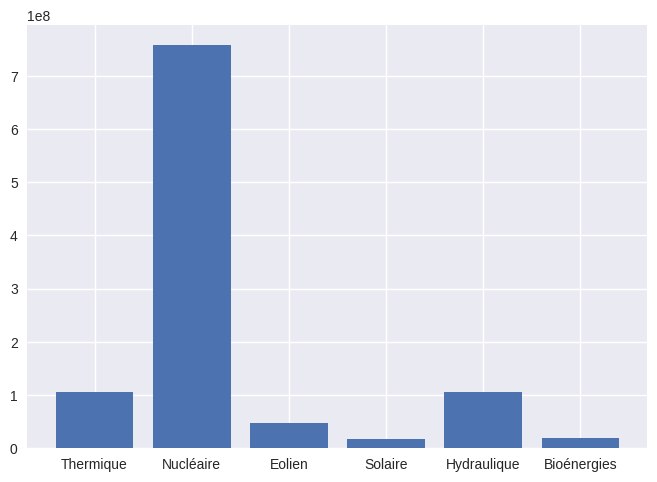

In [80]:
# When thinking about pie charts, give a try to horizontal bars.
#ToDo
labels = ['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']
sizes = list(dataView1.iloc[0,])
#ToDo
plt.bar(x=labels, height=sizes)
plt.show()

## Exercise : Area chart

Go ahead and explore trends in the evolution of the energy production with the help of an area chart

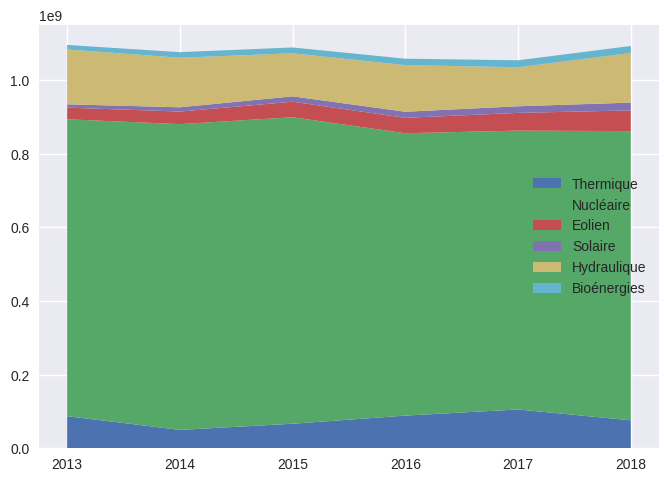

In [96]:
# Explore trends
plt.style.use('seaborn-v0_8')
df['Annee'] = df.index.year
df.reset_index()
dataView2 = df[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies', 'Annee']].groupby(['Annee']).agg('sum')
dataView2
#ToDo
# labels = ['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']

# Create data
x=list(dataView2.index)
for c in list(dataView2.columns):
    y=list(dataView2[c])
# Area plot
    # plt.fill_between(x, y)

plt.stackplot(x,list(dataView2['Thermique']),list(dataView2['Nucléaire']), list(dataView2['Eolien']), list(dataView2['Solaire']), list(dataView2['Hydraulique']), list(dataView2['Bioénergies']), labels=list(dataView2.columns))
plt.legend(loc='center right')
plt.show()


## Exercise : Scatter Plot

Scatter plots are helpful to put in evidence relationships between two variables. Can you find a data relationships and make it visible with a plot ?

_Bonus: try Seaborn's joint plots_

In [ ]:
# Explore relationships between variables with a scatter plot

#ToDo

In [ ]:
# let's use the amazing Seaborn library to plot even more insightfull scatter plots:
import seaborn as sns # make sure you installed the library with pip or conda!

# create a joint plot using Seaborn:

#ToDo

# Plotting with Plotly (optional)

In order to go further you can start exploring an alternative ploting library: Plotly.

Two possible ways of using plotly with pandas :
 - https://plotly.com/python/pandas-backend/
 - https://github.com/santosjorge/cufflinks
 - https://coderzcolumn.com/tutorials/data-science/cufflinks-how-to-create-plotly-charts-from-pandas-dataframe-with-one-line-of-code
 
Repeat the previous exercises using the Plotly/Cufflinks backend for Pandas. 

Which library do you prefer ? Which plotly integration works better ?